In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

## IMPORTING DATA AND PREPROCESSING 

In [2]:
data = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Multi Linear Regression\ToyotaCorolla.csv", encoding ='latin1')

In [3]:
data.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [4]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
# Importan columns to be used
df = data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]

In [6]:
df

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
df.isnull().sum()

Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace = True)

C:\Users\mobin\AppData\Local\Temp\ipykernel_19816\3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [11]:
df.duplicated().sum()

0

In [12]:
df = df.rename({'Age_08_04': 'Age' , 'Quarterly_Tax':'QTX'}, axis = 1)

In [13]:
df.head()

,Age,KM,HP,cc,Doors,Gears,QTX,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


<Axes: >

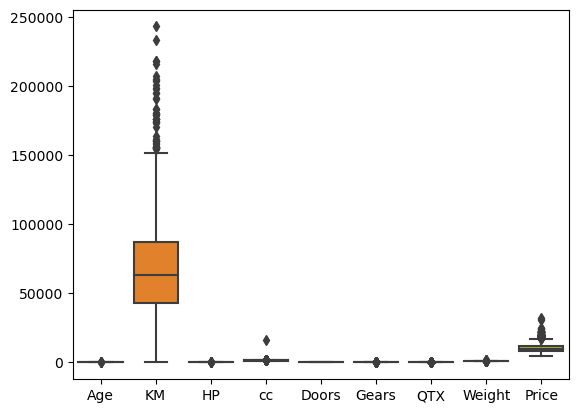

In [14]:
sns.boxplot(df)

In [15]:
df.corr()

,Age,KM,HP,cc,Doors,Gears,QTX,Weight,Price
Age,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143,0.314134
cc,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077,0.124375
Doors,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734,0.183604
Gears,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238,0.063831
QTX,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988,0.211508
Weight,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869,1.000000


C:\Users\mobin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


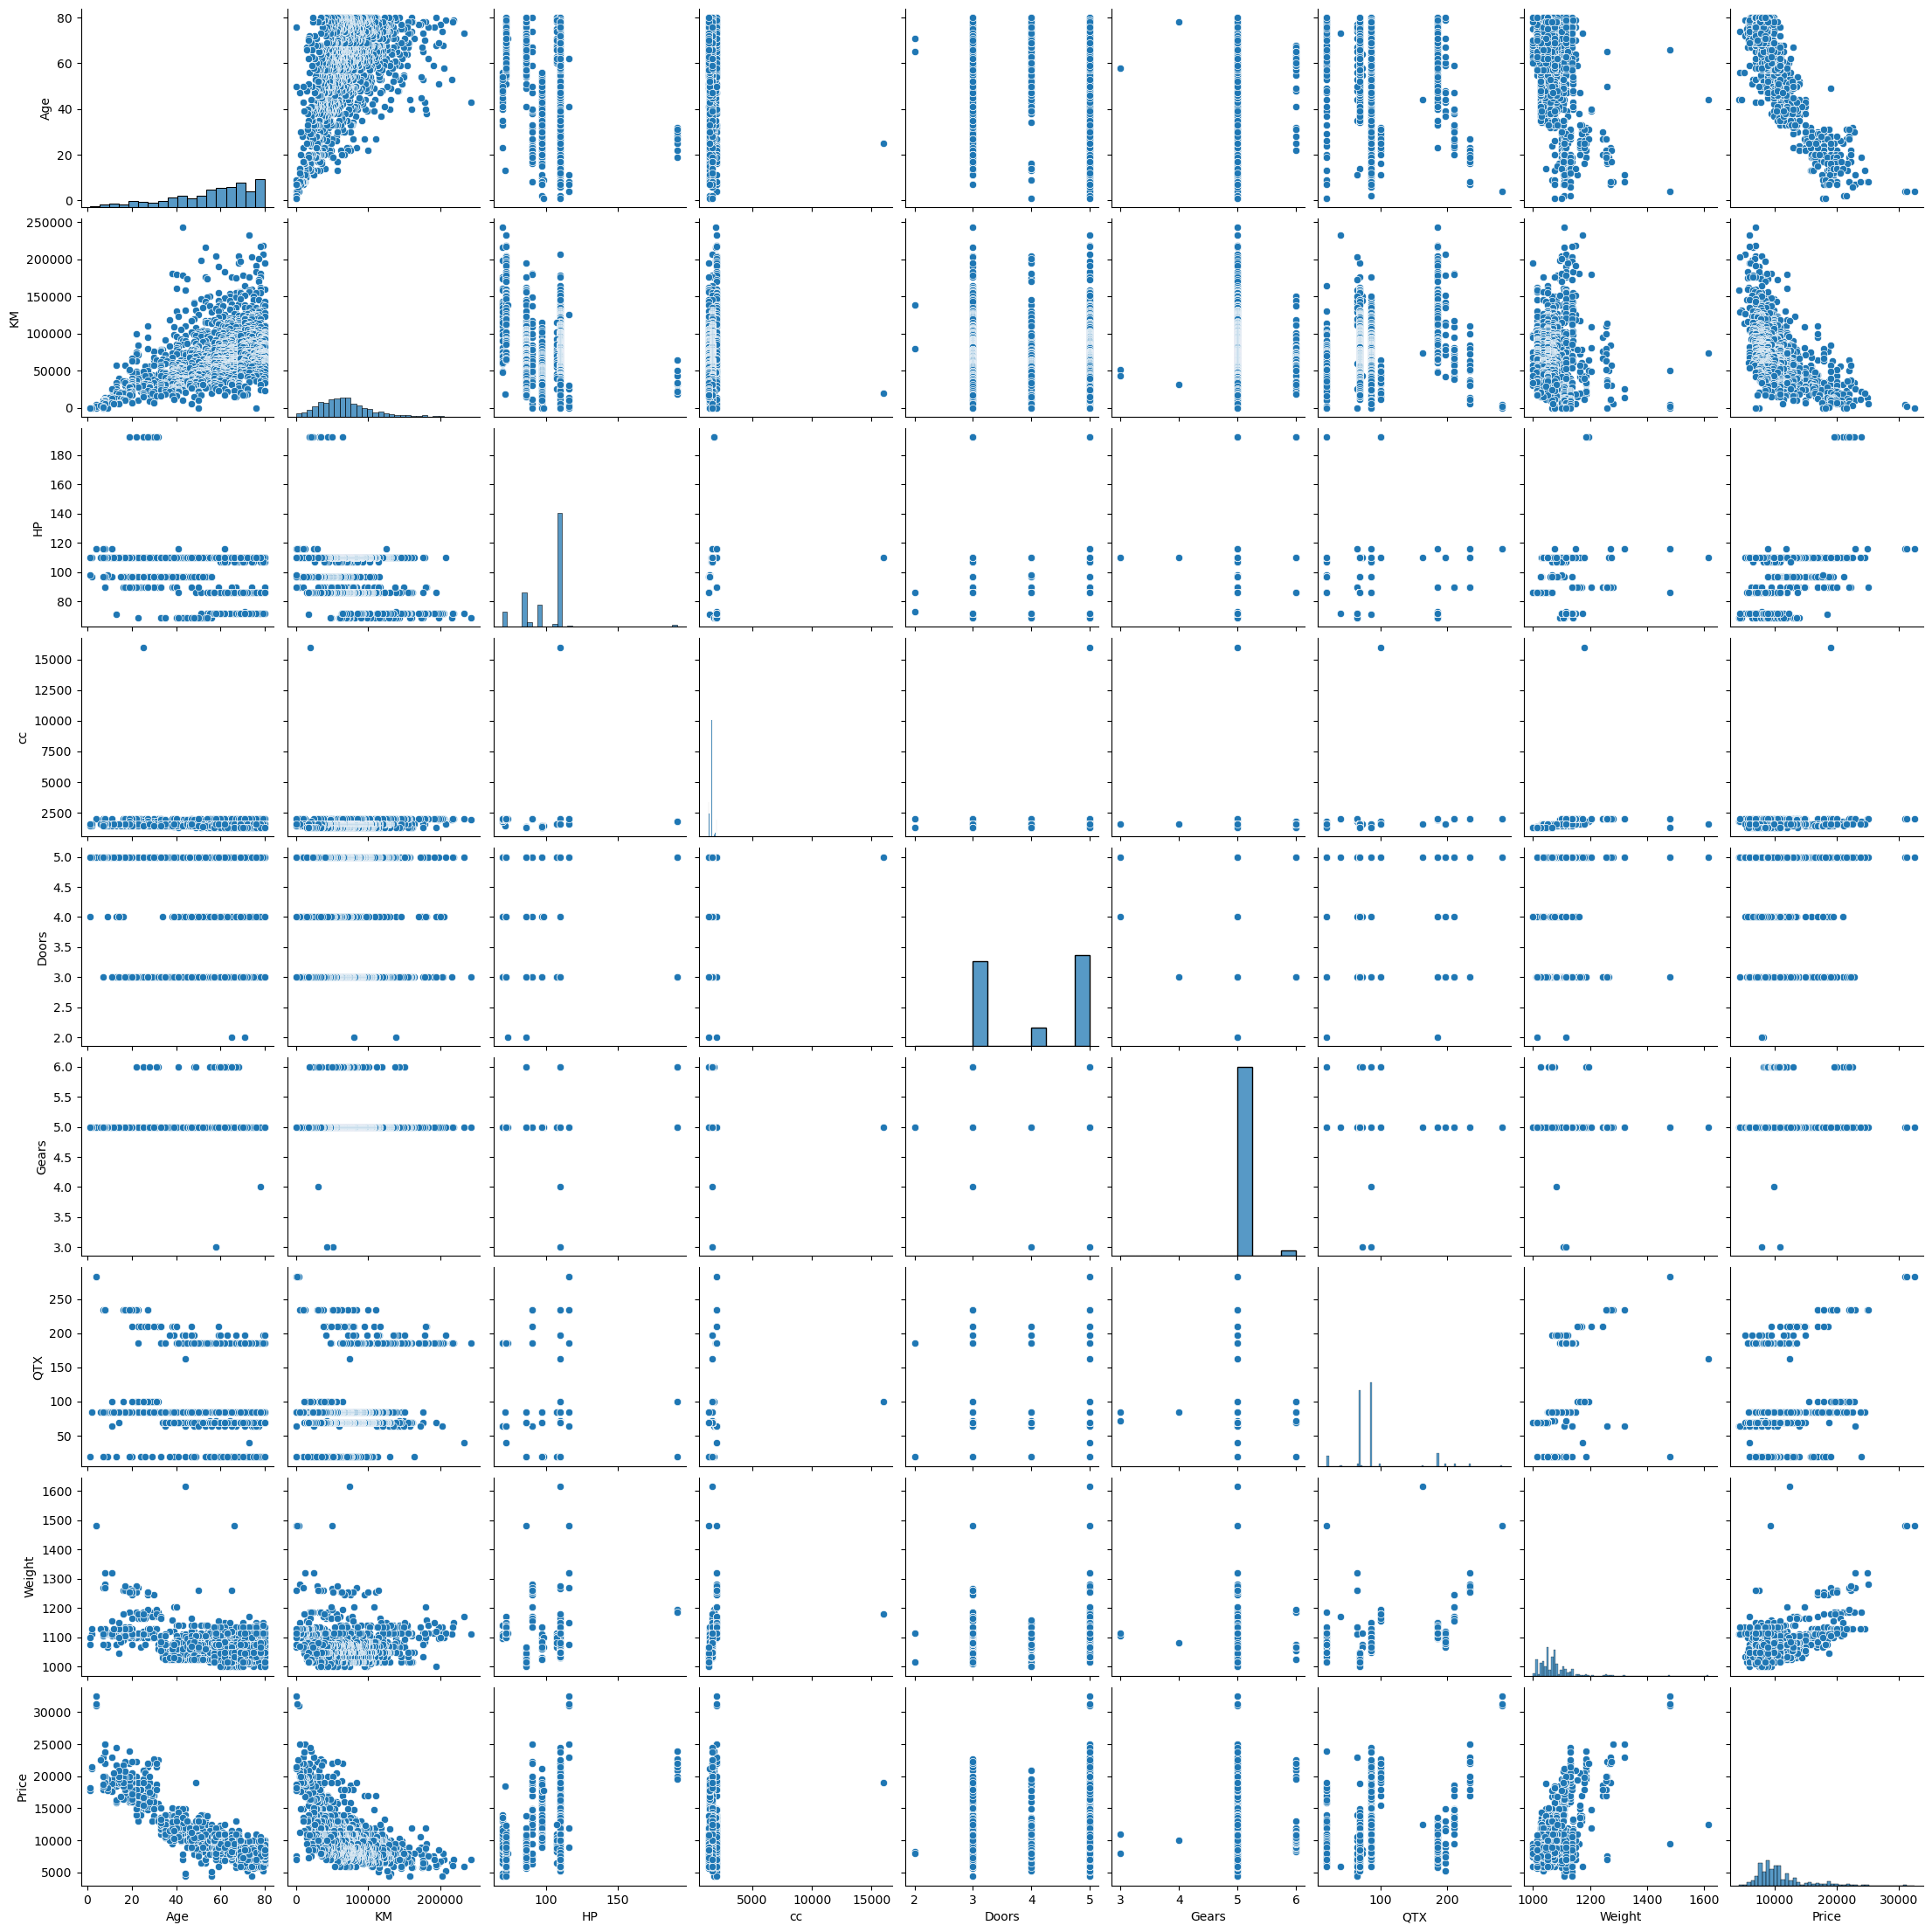

In [16]:
sns.pairplot(df)

## REGRESSION MODEL BUILDING

In [17]:
df.columns

Index(['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTX', 'Weight', 'Price'], dtype='object')

In [18]:
model = smf.ols('Price~ Age + KM + HP + cc + Doors + Gears + QTX + Weight', data = df ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:08:03   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTX            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Validation
## Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [19]:
df.columns

Index(['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTX', 'Weight', 'Price'], dtype='object')

In [20]:
# Calculating Variance Inflation Factor(VIF) 
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables


rsq_age = smf.ols('Age~KM + HP + cc + Doors + Gears + QTX + Weight', data = df).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age + HP + cc + Doors + Gears + QTX + Weight', data = df).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM + Age + cc + Doors + Gears + QTX + Weight', data = df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~KM + HP + Age + Doors + Gears + QTX + Weight', data = df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_door = smf.ols('Doors~KM + HP + cc + Age + Gears + QTX + Weight', data = df).fit().rsquared
vif_door = 1/(1-rsq_door)

rsq_gear = smf.ols('Gears~KM + HP + cc + Doors + Age + QTX + Weight', data = df).fit().rsquared
vif_gear = 1/(1-rsq_gear)

rsq_qtx = smf.ols('QTX~KM + HP + cc + Doors + Gears + Age + Weight', data = df).fit().rsquared
vif_qtx = 1/(1-rsq_qtx)

rsq_weight = smf.ols('Weight~KM + HP + cc + Doors + Gears + QTX + Age', data = df).fit().rsquared
vif_weight = 1/(1-rsq_weight)



d1 = {'Variables':['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTX', 'Weight'],
    'VIF':[vif_age , vif_km , vif_hp , vif_cc , vif_door , vif_gear , vif_qtx , vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame



,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTX,2.295375
7,Weight,2.487180


In [21]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation


In [22]:

# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

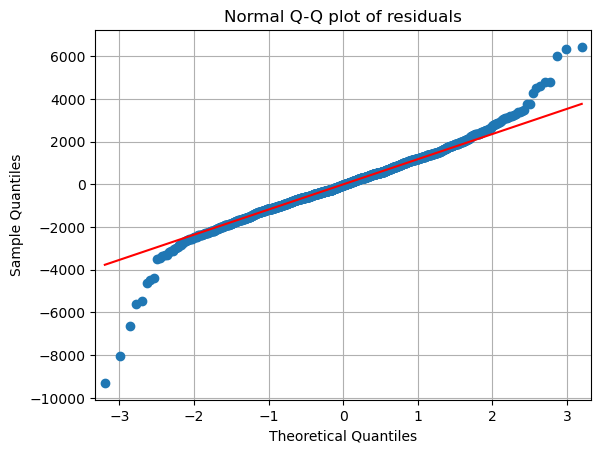

In [23]:
qqplot = sm.qqplot(model.resid , line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.grid()
plt.show()

In [24]:
def stander_values(vals):
    return (vals - vals.mean())/vals.std()

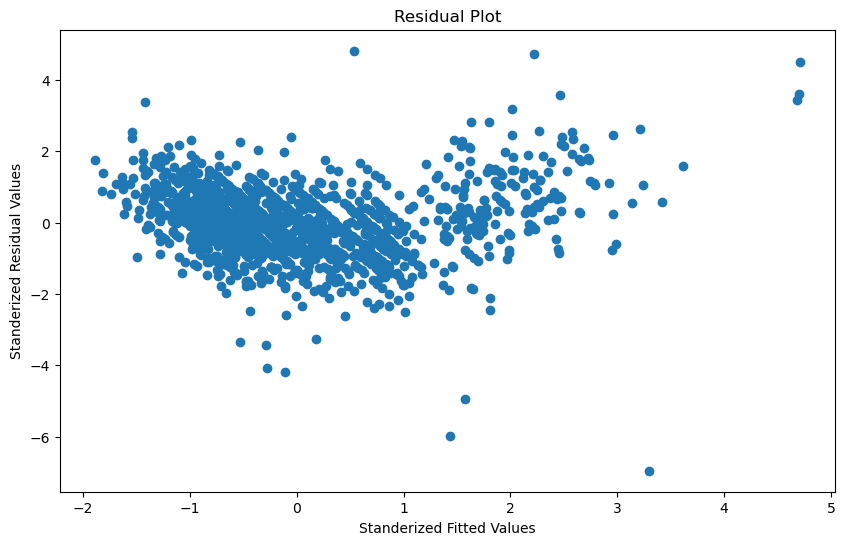

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(stander_values(model.fittedvalues),
           stander_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standerized Fitted Values')
plt.ylabel('Standerized Residual Values')
plt.show()

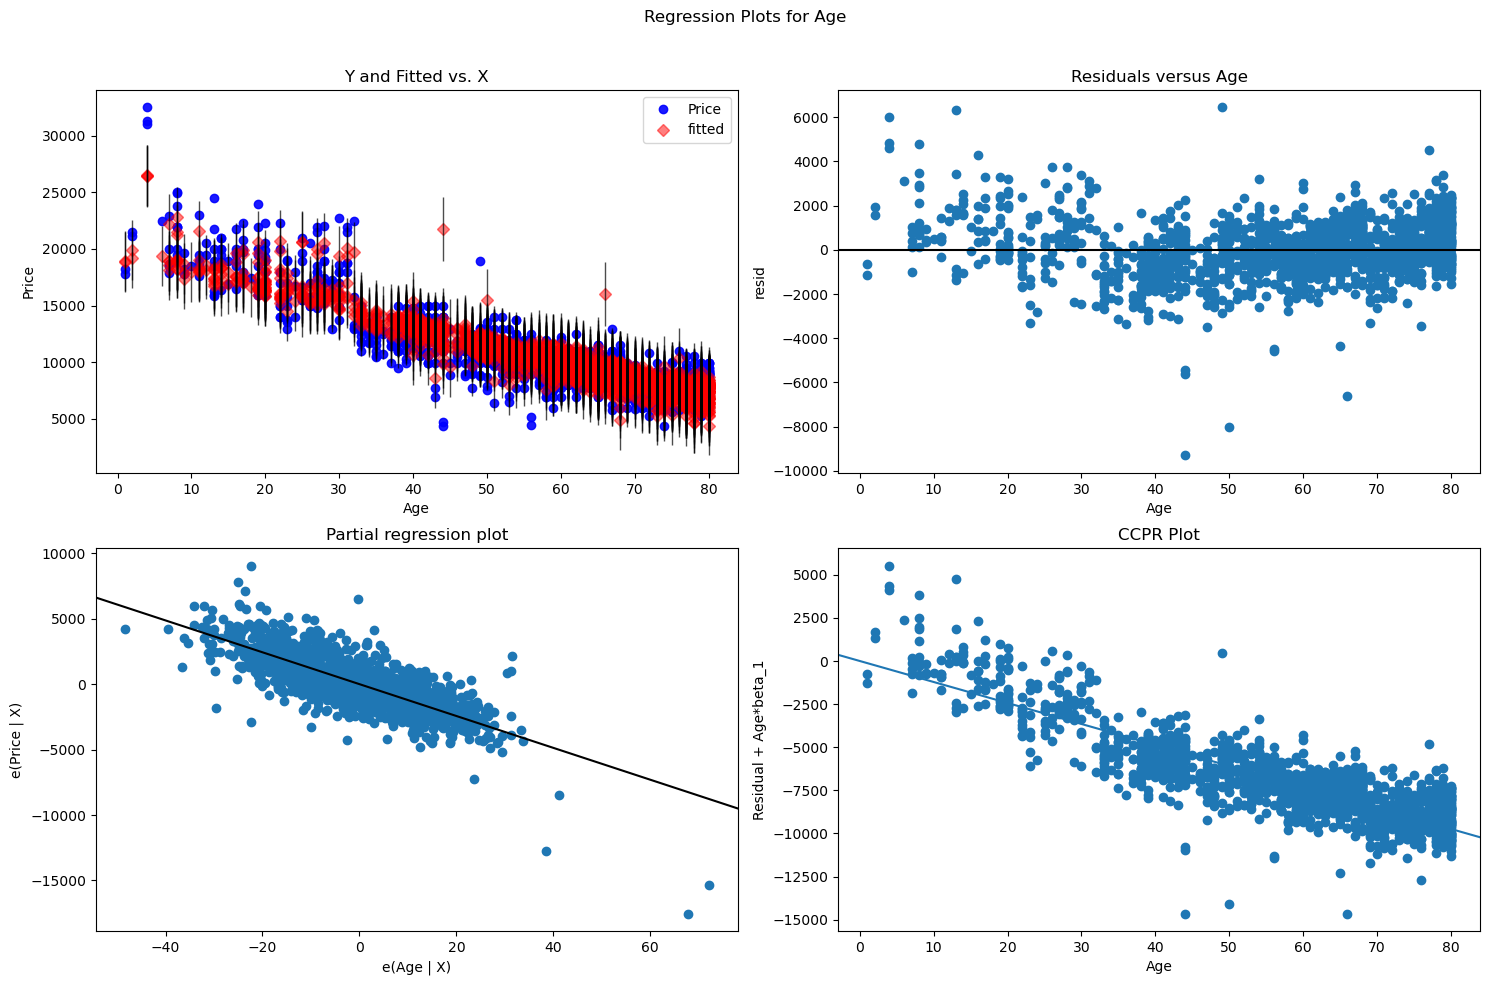

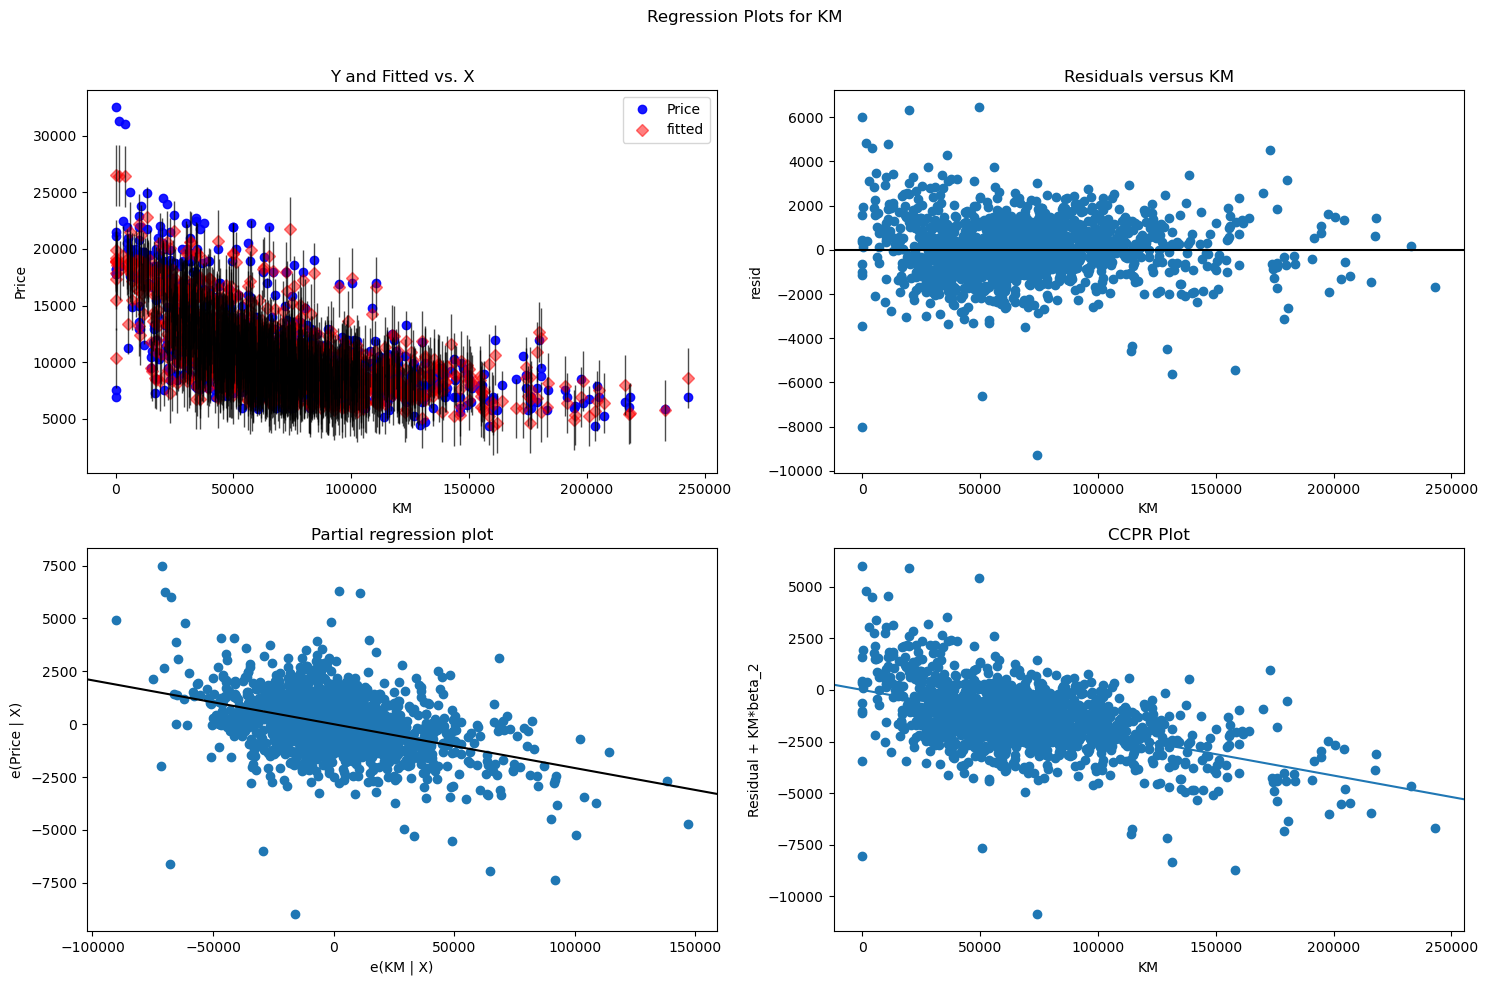

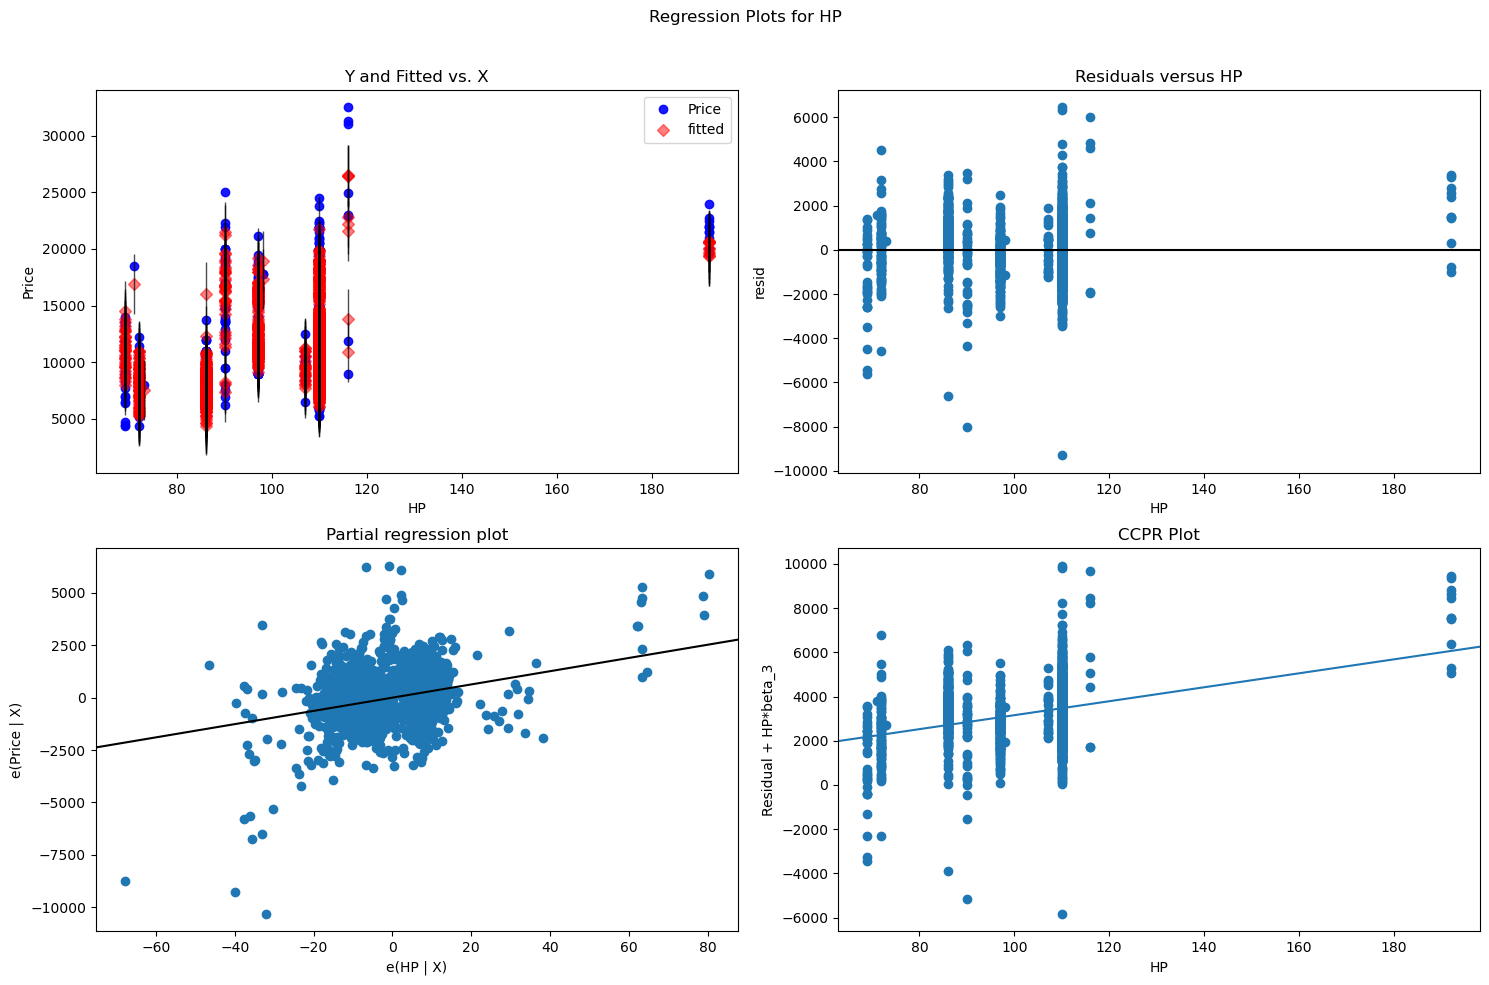

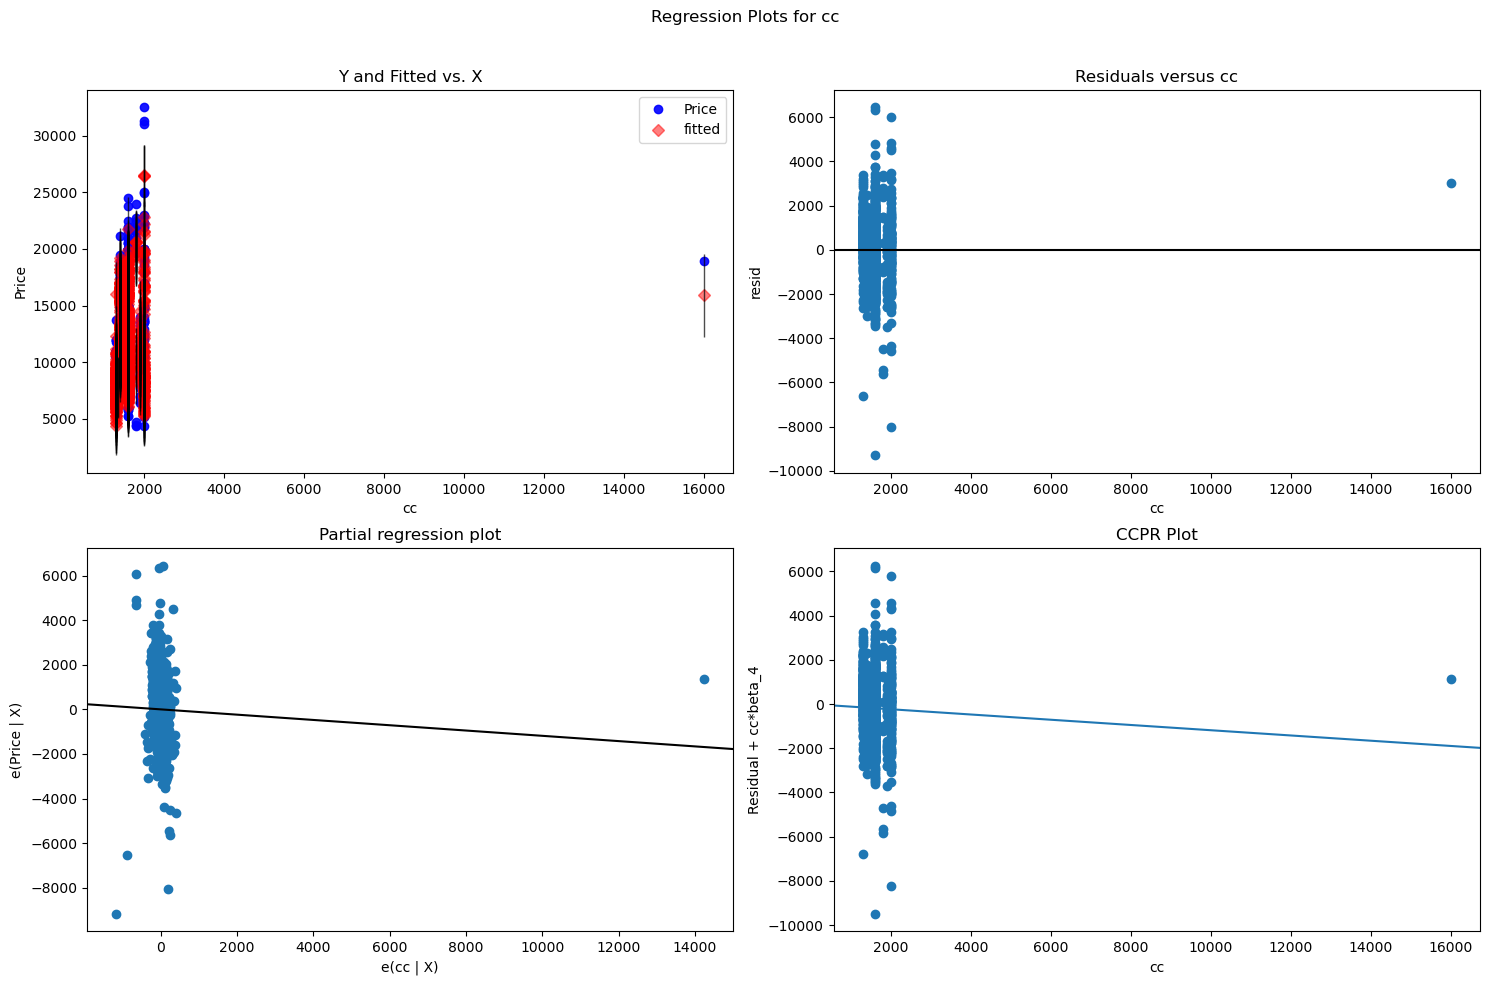

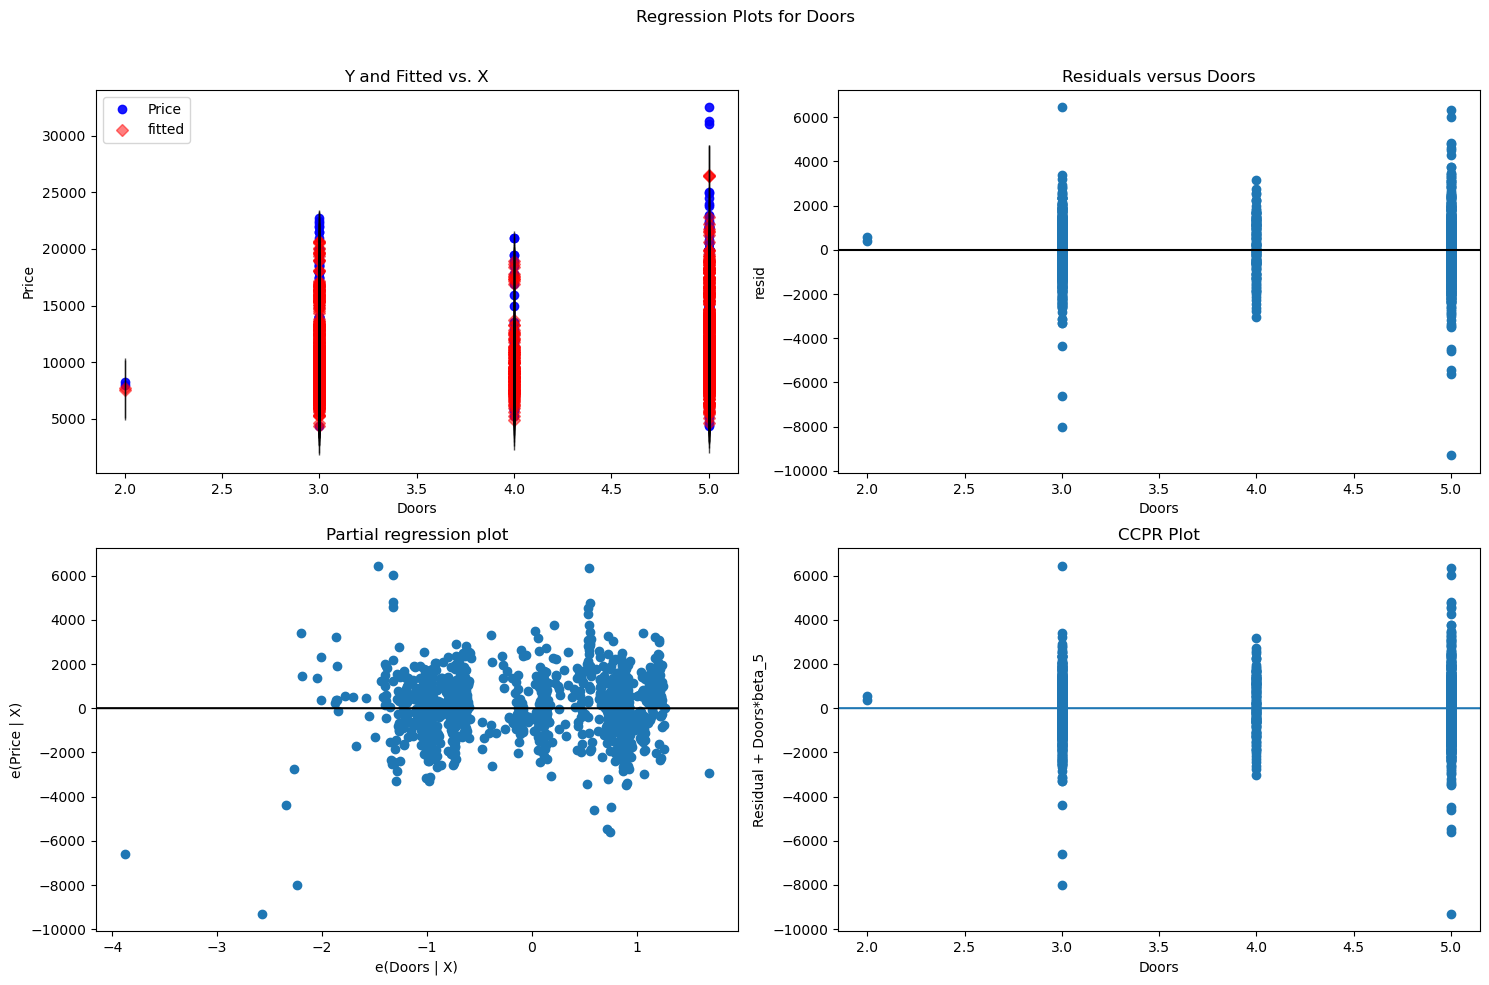

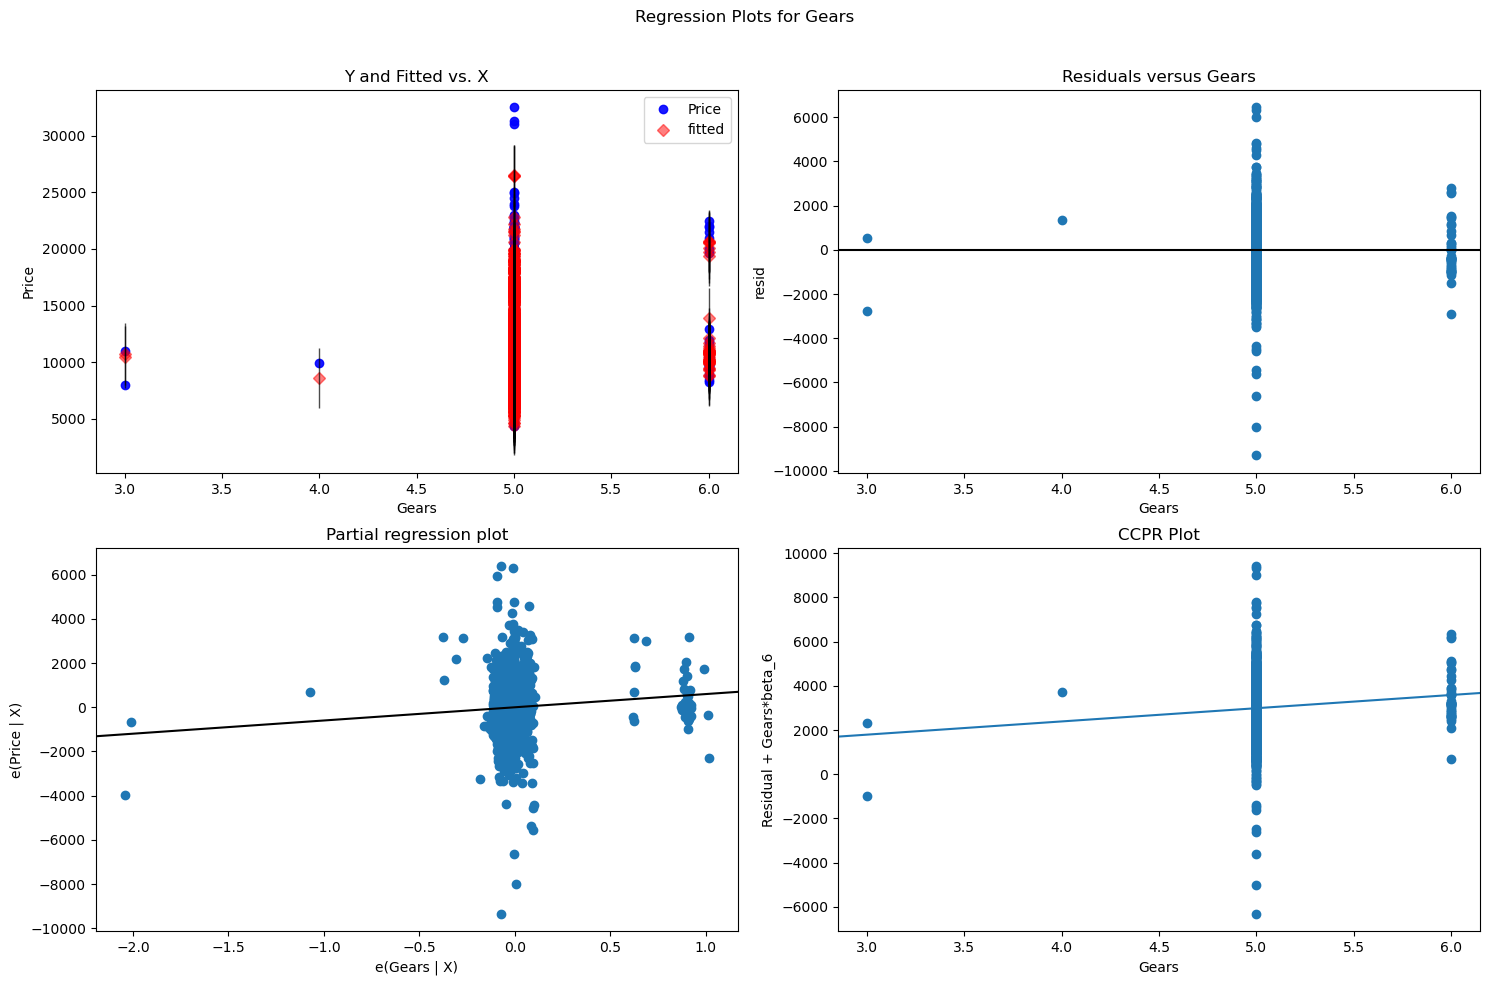

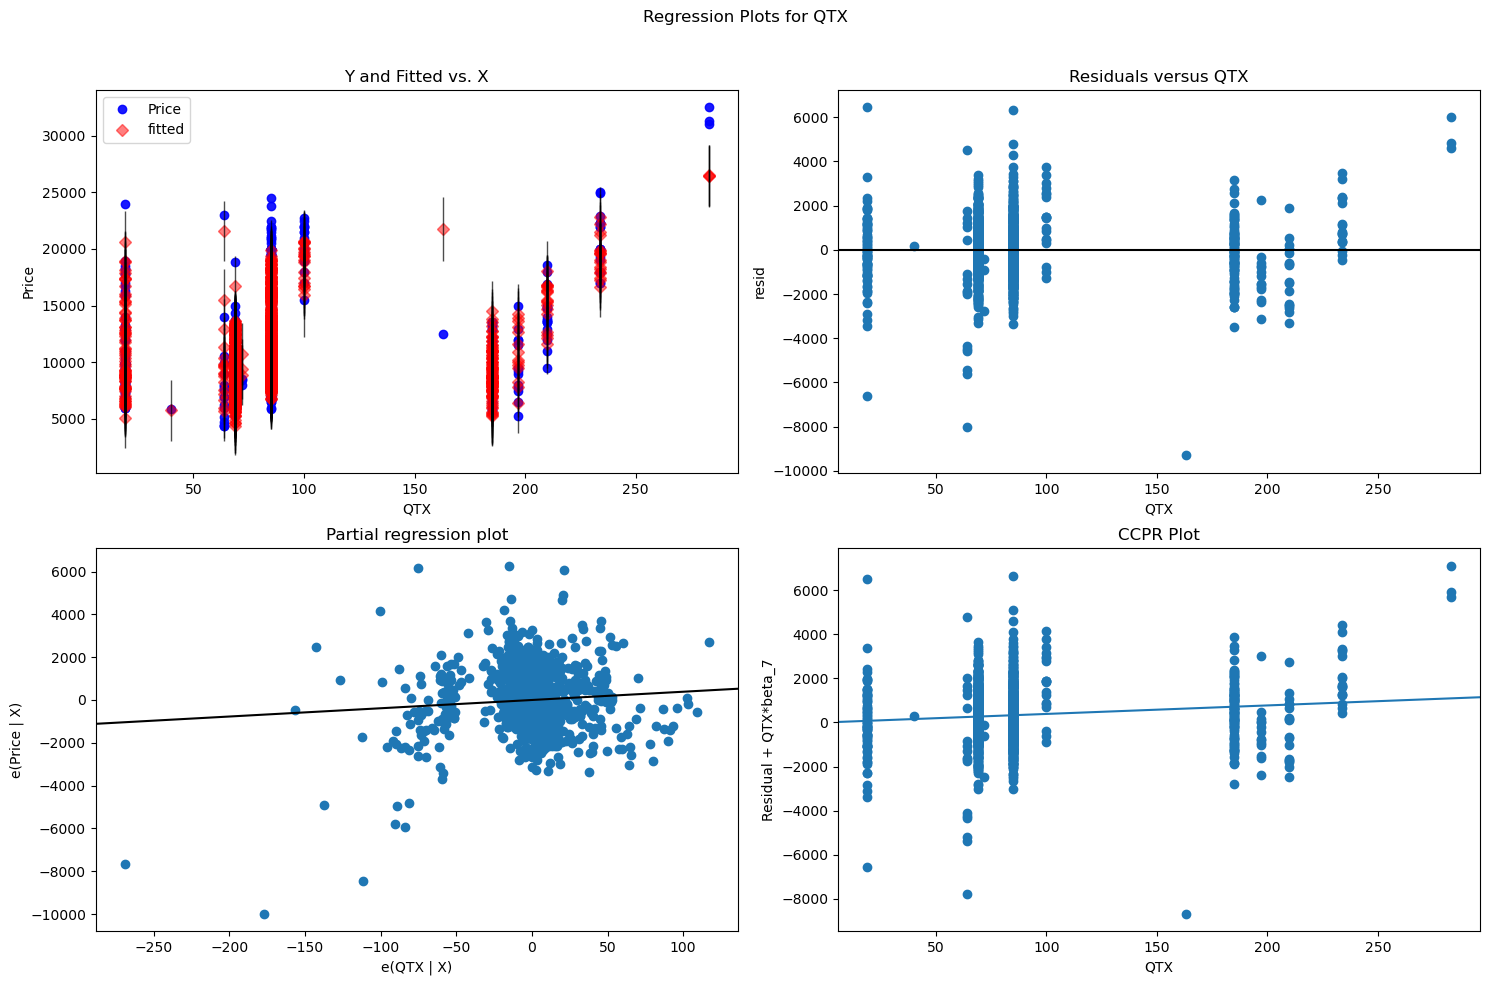

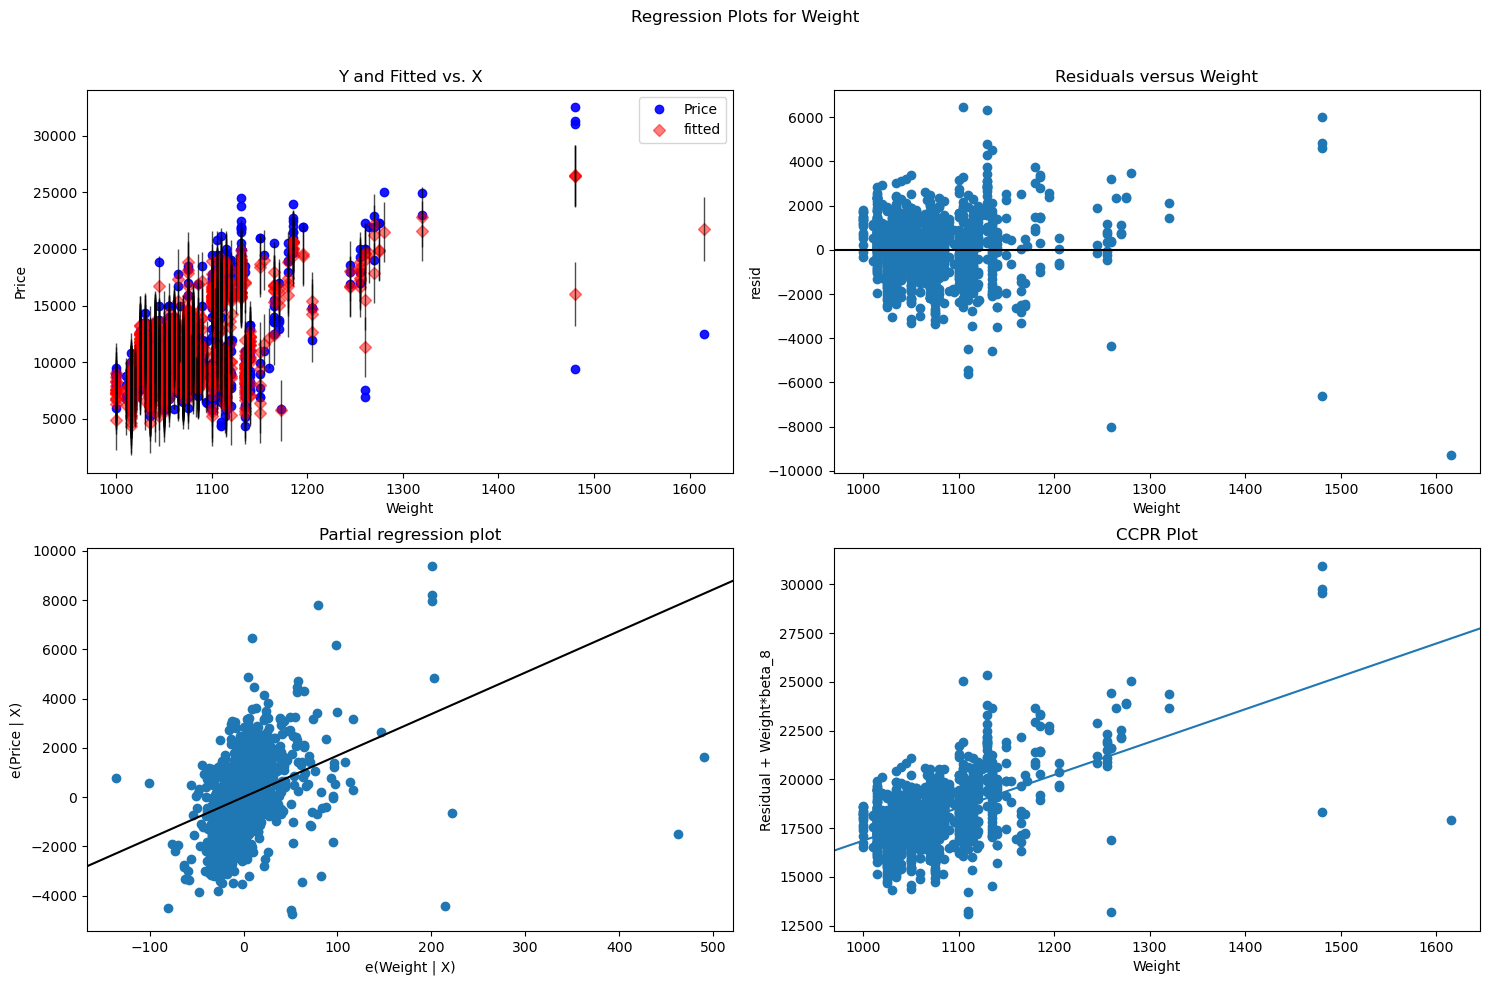

In [34]:
for i in df.columns[0:8]:
    fig = plt.figure(figsize = (15,10))
    sm.graphics.plot_regress_exog(model,i, fig = fig)
    plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)¶
## Two Techniques : 1. Cook's Distance & 2. Leverage value

In [36]:
# Cook's Distance

cook_model = model.get_influence()
(C , _) = cook_model.cooks_distance

C

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

<StemContainer object of 3 artists>

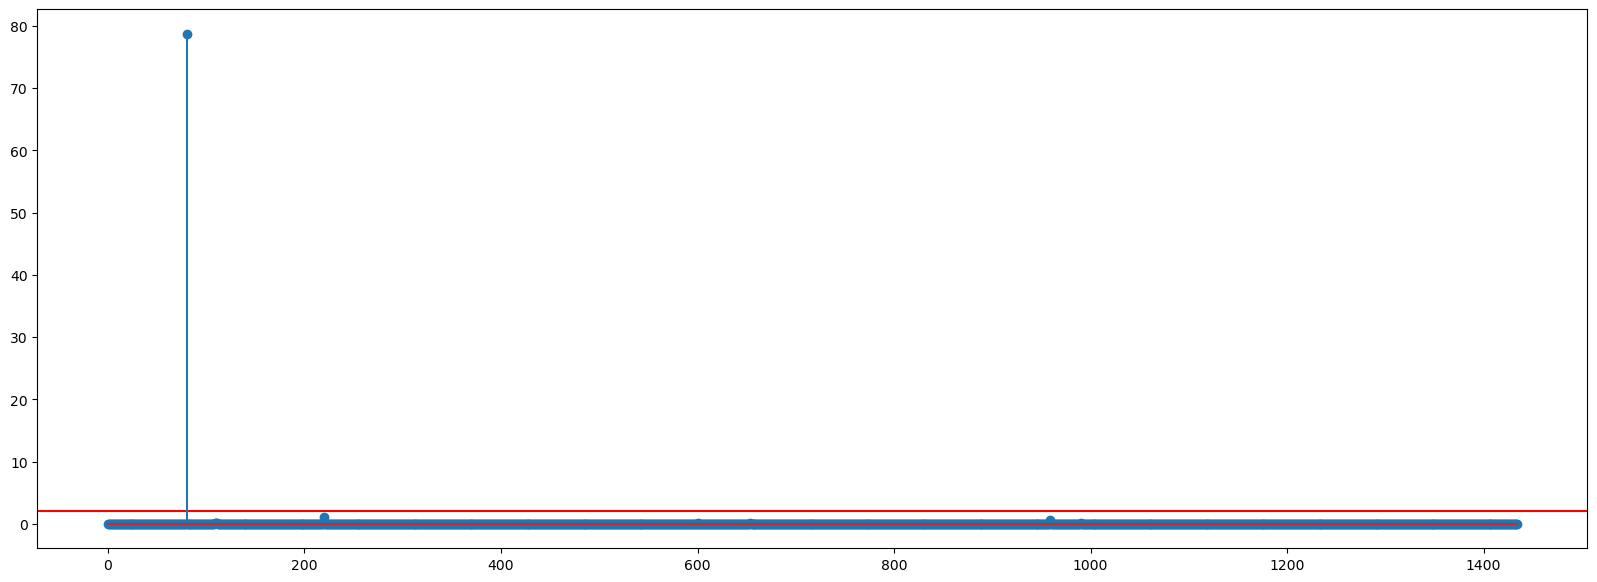

In [45]:
fig = plt.subplots(figsize = (20,7))
plt.axhline(y = 2 , color = 'red')
plt.stem(np.arange(len(df)) , np.round(C , 3))

In [39]:
np.argmax(C), np.max(C)

(80, 78.72950582248677)

In [43]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

<Figure size 1500x800 with 0 Axes>

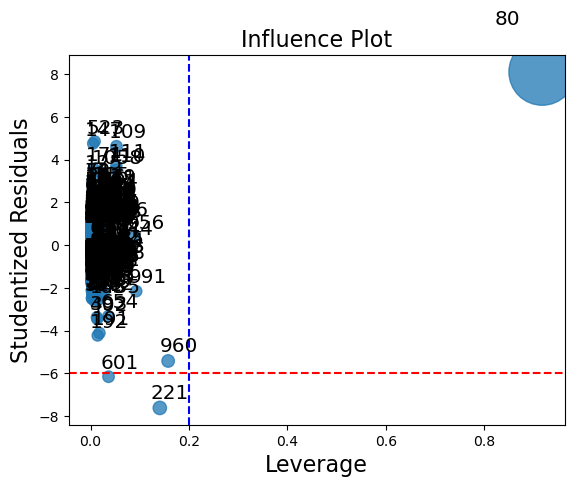

In [52]:
plt.figure(figsize = (15,8))
influence_plot(model , alpha = 0.5)
plt.axhline(y = -6 , color= 'red' , linestyle = '--')
plt.axvline(x = 0.2 , color= 'blue' , linestyle = '--')

In [53]:
df[df.index.isin([80])]

,Age,KM,HP,cc,Doors,Gears,QTX,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


## Improving Model

In [55]:
df_1 = df.drop(df.index[80] , axis = 0).reset_index(drop = True)
df_1.head()

,Age,KM,HP,cc,Doors,Gears,QTX,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [56]:
final_model = smf.ols('Price~ Age + KM + HP + cc + Doors + Gears + QTX + Weight', data = df_1 ).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:47:56   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
cc            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QTX            8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
model.rsquared , final_model.rsquared

(0.8625200256947, 0.8681163912634055)

## PREDICTING THE DATA

In [58]:
new_data = pd.DataFrame(df_1 , columns = df.columns[0:8])

In [59]:
new_data

,Age,KM,HP,cc,Doors,Gears,QTX,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,5,69,1025
1430,72,19000,86,1300,3,5,69,1015
1431,71,17016,86,1300,3,5,69,1015
1432,70,16916,86,1300,3,5,69,1015


In [60]:
pred_y = final_model.predict(new_data)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64

In [61]:
new_data['Predicted'] = pred_y

In [62]:
new_data

,Age,KM,HP,cc,Doors,Gears,QTX,Weight,Predicted
0,23,46986,90,2000,3,5,210,1165,16513.565909
1,23,72937,90,2000,3,5,210,1165,16051.656226
2,24,41711,90,2000,3,5,210,1165,16486.949796
3,26,48000,90,2000,3,5,210,1165,16133.995128
4,30,38500,90,2000,3,5,210,1170,15921.372341
...,...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,5,69,1025,8970.611964
1430,72,19000,86,1300,3,5,69,1015,8435.944671
1431,71,17016,86,1300,3,5,69,1015,8591.765915
1432,70,16916,86,1300,3,5,69,1015,8714.053275


In [63]:
df.head()

,Age,KM,HP,cc,Doors,Gears,QTX,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
